In [116]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
import os
from os import walk
import matplotlib.pylab as plt


In [2]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        data_pd_i['Concentration'] = label

        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [104]:

folder_path = "C:\\Users\\Modern\\Desktop\\Бельская\\Converted"

files = []
for (dirpath, dirnames, filenames) in walk(folder_path):
    for file in filenames:
        files.append(os.path.join(dirpath, file))

print(files)

['C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\Amb.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-349 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-349.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-418 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\BNTM-477 UV.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\PGA-357.xlsx', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\PGA-418.xlsx']


In [105]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

for file in files:
   file_name_ext = os.path.basename(file)
   file_name,extention = file_name_ext.split(".")

   file_raw = pd.read_excel(file) 

   data_pd = excel_to_pd(data_pd,data_pd_i,file_raw,'Vero',file_name)

print(data_pd)

       OD Cell_type Substance Concentration
0   0.955      Vero       Amb          10-4
1   0.996      Vero       Amb          10-4
2   1.518      Vero       Amb          10-4
3   1.176      Vero       Amb          10-4
4   1.318      Vero       Amb          10-4
..    ...       ...       ...           ...
13    NaN      Vero   PGA-418       Control
14    NaN      Vero   PGA-418       Control
15    NaN      Vero   PGA-418       Control
16    NaN      Vero   PGA-418       Control
17    NaN      Vero   PGA-418       Control

[504 rows x 4 columns]


<AxesSubplot: xlabel='Substance', ylabel='OD'>

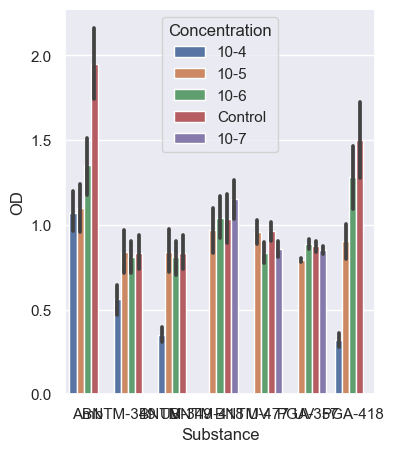

In [106]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

Recalculation to relative values:

In [107]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = data_pd['Substance'].unique()

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_ext[(data_ext['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD'].mean()
    data_i['Relative'] = data_i['OD']/control_mean*100
    data = pd.concat([data,data_i])
  
print(data)

       OD   Relative Substance Concentration Cell_type
0   0.955  48.930447       Amb          10-4      Vero
1   0.996  51.031126       Amb          10-4      Vero
2   1.518  77.776355       Amb          10-4      Vero
3   1.176  60.253619       Amb          10-4      Vero
4   1.318  67.529141       Amb          10-4      Vero
..    ...        ...       ...           ...       ...
13    NaN        NaN   PGA-418       Control      Vero
14    NaN        NaN   PGA-418       Control      Vero
15    NaN        NaN   PGA-418       Control      Vero
16    NaN        NaN   PGA-418       Control      Vero
17    NaN        NaN   PGA-418       Control      Vero

[504 rows x 5 columns]


C:\Users\Modern\AppData\Local\Temp\ipykernel_18932\100675119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i['Relative'] = data_i['OD']/control_mean*100
C:\Users\Modern\AppData\Local\Temp\ipykernel_18932\100675119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i['Relative'] = data_i['OD']/control_mean*100
C:\Users\Modern\AppData\Local\Temp\ipykernel_18932\100675119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [125]:
unique_substances= data['Substance'].unique()
print(unique_substances)

extracted_data = data[(data['Substance'] == 'PGA-357')].copy()

unique_concentrations= extracted_data['Concentration'].unique()
unique_substances= extracted_data['Substance'].unique()

pairs = []
for subst in unique_substances:
    for conc in unique_concentrations:
        # if conc == 'Control':
        #     break
        pairs.append(((subst,conc),(subst,'Control')))
        

print(pairs)


['Amb' 'BNTM-349 UV' 'BNTM-349' 'BNTM-418 UV' 'BNTM-477 UV' 'PGA-357'
 'PGA-418']
[(('PGA-357', '10-5'), ('PGA-357', 'Control')), (('PGA-357', '10-6'), ('PGA-357', 'Control')), (('PGA-357', '10-7'), ('PGA-357', 'Control')), (('PGA-357', 'Control'), ('PGA-357', 'Control'))]


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PGA-357_Control vs. PGA-357_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.620e+02
PGA-357_10-7 vs. PGA-357_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.255e+02
PGA-357_10-6 vs. PGA-357_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.835e+02
PGA-357_10-5 vs. PGA-357_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.835e-04 U_stat=4.000e+01


(<AxesSubplot: ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x29d79fbe530>])

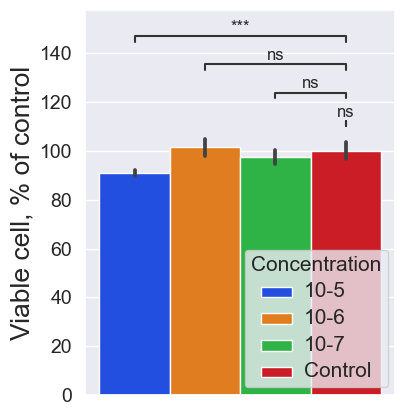

In [126]:
ax = sns.barplot(data = extracted_data, x = 'Substance', y = 'Relative', hue = 'Concentration',palette='bright')

sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,5)})

ax.legend(loc='lower right', title='Concentration')
plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='15') 

ax.set(xlabel=None, ylabel='Viable cell, % of control')
ax.set(xticklabels=[])
ax.yaxis.get_label().set_fontsize(19)
ax.xaxis.get_label().set_fontsize(19)
ax.tick_params(axis='y', which='major', labelsize=14)

annotator = Annotator(ax, pairs, data=extracted_data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

